# DSCI 503 - Project 03
### Symphony Hopkins

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Part 1: Loading the Dataset; Preliminary Analysis

The purpose of this section is to convert the diamonds.txt file into a Pandas DataFrame. After that, we will perform a preliminary analysis on the DataFrame.

In [2]:
diamonds = pd.read_csv('diamonds.txt', sep = '\t')
diamonds.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


Now we will determine the size of the dataset.

In [3]:
print(diamonds.shape)

(53940, 10)


We will now look at the summary statistics and distribution of the dataset.

In [4]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Part 2: Filtering and Sorting

We will use filtering and sorting methods to find the top five most expensive diamonds in the dataset. 

In [5]:
diamonds[['price', 'carat','cut','color','clarity']].sort_values(by = 'price', ascending = False).head()

,price,carat,cut,color,clarity
27750,18823,2.29,Premium,I,VS2
27749,18818,2.00,Very Good,G,SI1
27748,18806,1.51,Ideal,G,IF
27747,18804,2.07,Ideal,G,SI2
27746,18803,2.00,Very Good,H,SI1


We will now look at the five least expensive diamonds in the dataset. 

In [6]:
diamonds[['price', 'carat','cut','color','clarity']].sort_values(by = 'price', ascending = True).head()

,price,carat,cut,color,clarity
1,326,0.23,Ideal,E,SI2
2,326,0.21,Premium,E,SI1
3,327,0.23,Good,E,VS1
4,334,0.29,Premium,I,VS2
5,335,0.31,Good,J,SI2


We will look at the five largest diamonds in the dataset with an ideal cut.

In [7]:
diamonds[['price', 'carat','cut','color','clarity']][diamonds['cut'] == 'Ideal'].sort_values(by = 'carat', ascending = False).head()

,price,carat,cut,color,clarity
24329,12587,3.50,Ideal,H,I1
24298,12545,3.22,Ideal,I,I1
26468,16037,3.01,Ideal,J,SI2
26745,16538,3.01,Ideal,J,I1
24785,13156,2.75,Ideal,D,I1


We will look at the five largest diamonds in the dataset with a fair cut.

In [8]:
diamonds[['price', 'carat','cut','color','clarity']][diamonds['cut'] == 'Fair'].sort_values(by = 'carat', ascending = False).head()

,price,carat,cut,color,clarity
27416,18018,5.01,Fair,J,I1
27631,18531,4.50,Fair,J,I1
27131,17329,4.13,Fair,H,I1
23645,11668,3.65,Fair,H,I1
26432,15964,3.40,Fair,D,I1


## Part 3: Working with Categorical Variables

We will create lists to specify the order for the three categorical variables (clarity, cut, and color).

In [9]:
clarity_levels = [ 'I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
cut_levels = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_levels = ['J', 'I', 'H', 'G', 'F', 'E', 'D']

We will use the lists above to show Pandas the correct order for the levels in the categorical variables.

In [10]:
diamonds['clarity'] = pd.Categorical(diamonds['clarity'], clarity_levels)
diamonds['cut'] = pd.Categorical(diamonds['cut'], cut_levels)
diamonds['color'] = pd.Categorical(diamonds['color'], color_levels)

We will create three lists to be used as color palettes for the categorical variables. These lists will be used throughout the rest of the notebook.

In [11]:
clarity_pal = ['orangered','orange','gold','yellowgreen','mediumturquoise','deepskyblue','mediumpurple','hotpink']
color_pal = ['orangered','orange','gold','yellowgreen','mediumturquoise','deepskyblue','mediumpurple']
cut_pal = ['orangered','orange','gold','yellowgreen','mediumturquoise']

## Part 4: Displaying Counts for Categorical Variables

We will start this section by counting the number of diamonds at each cut level.

In [12]:
diamonds['cut'].value_counts().sort_index

<bound method Series.sort_index of Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64>

We will now count the number of diamonds at each color level.

In [13]:
diamonds['color'].value_counts().sort_index

<bound method Series.sort_index of G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64>

We will now count the number of diamonds at each clarity level.

In [14]:
diamonds['clarity'].value_counts().sort_index

<bound method Series.sort_index of SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64>

## Part 5: Scatterplots of Price Against Carat

We will create a series of scatter plots to show the price of the diamond versus carat size.

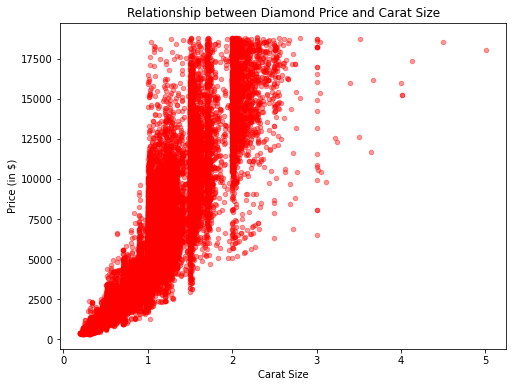

In [15]:
plt.figure(figsize = [8,6])

plt.scatter(diamonds['carat'], diamonds['price'],
            s=20, alpha=0.4, color= 'red')

plt.xlabel('Carat Size')
plt.ylabel('Price (in $)')
plt.title("Relationship between Diamond Price and Carat Size")   
plt.show()   

We will create a scatter plot similar to the one above but with different colors representing the different clarity levels.

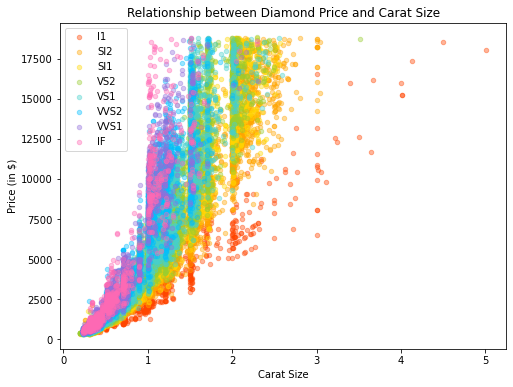

In [16]:
plt.figure(figsize = [8,6])
for i, c in enumerate(clarity_levels):
    plt.scatter(diamonds.loc[diamonds['clarity'] == c,'carat'], 
                diamonds.loc[diamonds['clarity'] == c,'price'],
                s=20, alpha=0.4, label=c,
                color = clarity_pal[i])

plt.xlabel('Carat Size')
plt.ylabel('Price (in $)')
plt.title("Relationship between Diamond Price and Carat Size")   
plt.legend()
plt.show()   

We will now create eight separate scatter plots to show the diamond price versus carat size at each clarity level.

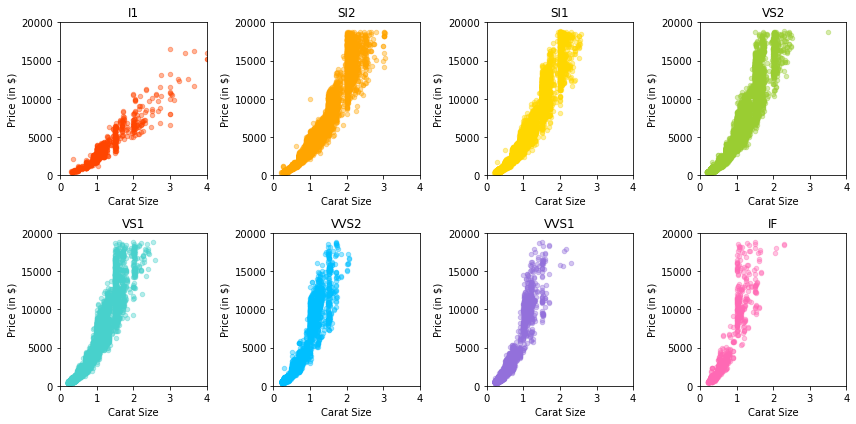

In [17]:
plt.figure(figsize = [12,6])
for i, c in enumerate(clarity_levels):  
    plt.subplot(2,4,i+1)
    plt.scatter(diamonds.loc[diamonds['clarity'] == c,'carat'], 
                diamonds.loc[diamonds['clarity'] == c,'price'],
                s=20, alpha=0.4, label=c,
                color = clarity_pal[i])
    plt.xlim([0,4])
    plt.ylim([0,20000])
    plt.xlabel('Carat Size')
    plt.ylabel('Price (in $)')
    plt.title(c) 

plt.tight_layout()
plt.show()

## Part 6: Applying Logarithmic Transformations

We will add two new columns to the diamonds dataset to get the natural log of the price and carat variables.

In [18]:
diamonds['ln_carat'] = np.log(diamonds['carat'])
diamonds['ln_price'] = np.log(diamonds['price'])

We will create two histograms to show the distribution of the diamond prices and the natural log of the diamond prices.

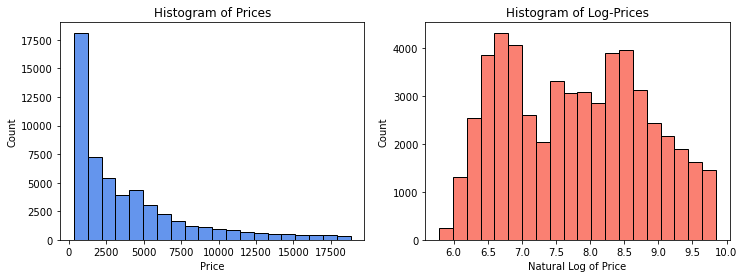

In [19]:
plt.figure(figsize=[12,4])
plt.subplot(1, 2, 1)
plt.hist(diamonds['price'], edgecolor='black', color='cornflowerblue', 
         bins= 20)
plt.title('Histogram of Prices')
plt.xlabel('Price')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.hist(diamonds['ln_price'], edgecolor='black', color='salmon', 
         bins=20)
plt.title('Histogram of Log-Prices')
plt.xlabel('Natural Log of Price')
plt.ylabel('Count')

plt.show()

We will create two histograms to show the distribution of the carat sizes and the natural log of the carat sizes.

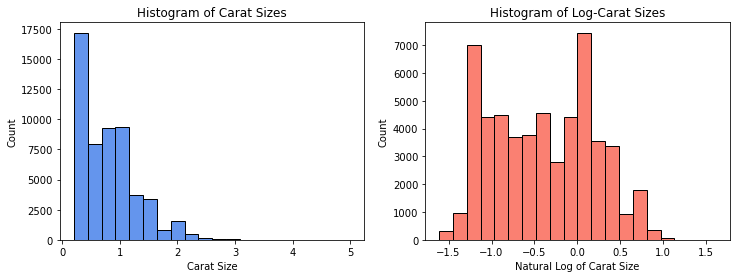

In [20]:
plt.figure(figsize=[12,4])
plt.subplot(1, 2, 1)
plt.hist(diamonds['carat'], edgecolor='black', color='cornflowerblue', 
         bins= 20)
plt.title('Histogram of Carat Sizes')
plt.xlabel('Carat Size')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.hist(diamonds['ln_carat'], edgecolor='black', color='salmon', 
         bins=20)
plt.title('Histogram of Log-Carat Sizes')
plt.xlabel('Natural Log of Carat Size')
plt.ylabel('Count')

plt.show()

## Part 7: Scatterplot of Transformed Variables

We will create a scatterplot showing the natural log of prices versus the natural log of carat sizes, with the point colors representing the clarity levels.

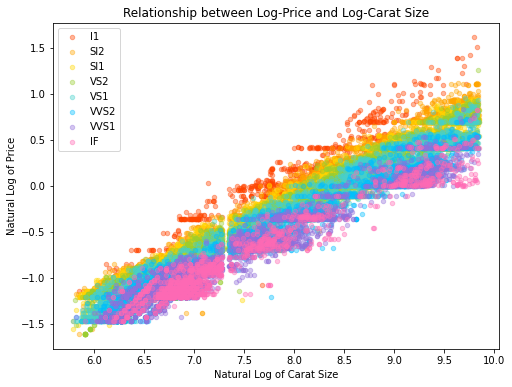

In [21]:
plt.figure(figsize = [8,6])
for i, c in enumerate(clarity_levels):
    plt.scatter(diamonds.loc[diamonds['clarity'] == c,'ln_price'], 
                diamonds.loc[diamonds['clarity'] == c,'ln_carat'],
                s=20, alpha=0.4, label=c,
                color = clarity_pal[i])

plt.xlabel('Natural Log of Carat Size')
plt.ylabel('Natural Log of Price')
plt.title("Relationship between Log-Price and Log-Carat Size")   
plt.legend()
plt.show()   

## Part 8: Grouping by Cut

We will create a DataFrame with the mean price and carat size for each cut level.

In [22]:
gb_cut = diamonds[['cut','price','carat']].copy().groupby(['cut']).mean().reset_index()
gb_cut

,cut,price,carat
0,Fair,4358.757764,1.046137
1,Good,3928.864452,0.849185
2,Very Good,3981.759891,0.806381
3,Premium,4584.257704,0.891955
4,Ideal,3457.541970,0.702837


We will create bar charts to display the information from the dataframe above.

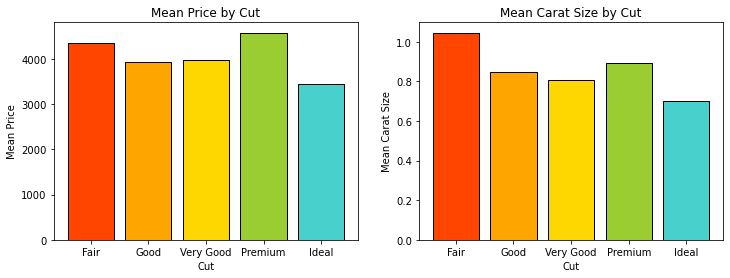

In [23]:
plt.figure(figsize=[12,4])
plt.subplot(1, 2, 1)
plt.bar(x=gb_cut['cut'], height=gb_cut['price'], color= cut_pal, edgecolor='black')
plt.xlabel('Cut')
plt.ylabel('Mean Price')
plt.title('Mean Price by Cut')


plt.subplot(1, 2, 2)
plt.bar(x=gb_cut['cut'], height=gb_cut['carat'], color=cut_pal, edgecolor='black')
plt.xlabel('Cut')
plt.ylabel('Mean Carat Size')
plt.title('Mean Carat Size by Cut')



plt.show()

## Part 9: Grouping by Color

We will find the mean price and carat size for each color level.

In [24]:
gb_color = diamonds[['color','price','carat']].copy().groupby(['color']).mean().reset_index()
gb_color

,color,price,carat
0,J,5323.818020,1.162137
1,I,5091.874954,1.026927
2,H,4486.669196,0.911799
3,G,3999.135671,0.771190
4,F,3724.886397,0.736538
5,E,3076.752475,0.657867
6,D,3169.954096,0.657795


We will create bar charts to display the information from the dataframe above.

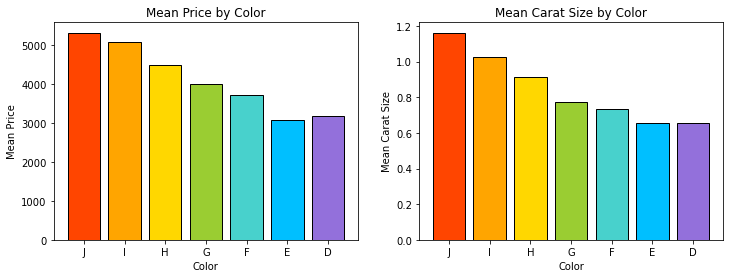

In [25]:
plt.figure(figsize=[12,4])
plt.subplot(1, 2, 1)
plt.bar(x=gb_color['color'], height=gb_color['price'], color= color_pal, edgecolor='black')
plt.xlabel('Color')
plt.ylabel('Mean Price')
plt.title('Mean Price by Color')

plt.subplot(1, 2, 2)
plt.bar(x=gb_color['color'], height=gb_color['carat'], color=color_pal, edgecolor='black')
plt.xlabel('Color')
plt.ylabel('Mean Carat Size')
plt.title('Mean Carat Size by Color')



plt.show()

## Part 10: Grouping by Clarity

We will find the mean price and carat size for each clarity level.

In [26]:
gb_clarity = diamonds[['clarity','price','carat']].copy().groupby(['clarity']).mean().reset_index()
gb_clarity

,clarity,price,carat
0,I1,3924.168691,1.283846
1,SI2,5063.028606,1.077648
2,SI1,3996.001148,0.850482
3,VS2,3924.989395,0.763935
4,VS1,3839.455391,0.727158
5,VVS2,3283.737071,0.596202
6,VVS1,2523.114637,0.503321
7,IF,2864.839106,0.505123


We will create bar charts to display the information from the dataframe above.

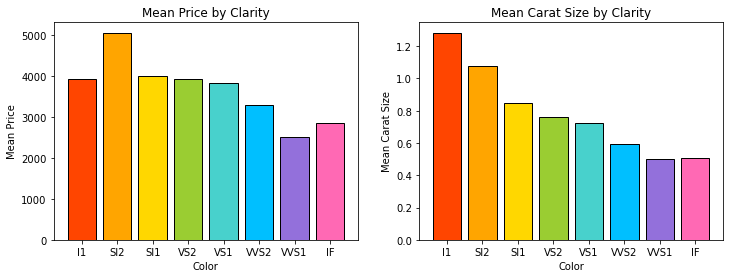

In [27]:
plt.figure(figsize=[12,4])
plt.subplot(1, 2, 1)
plt.bar(x=gb_clarity['clarity'], height=gb_clarity['price'], color= clarity_pal, edgecolor='black')
plt.xlabel('Color')
plt.ylabel('Mean Price')
plt.title('Mean Price by Clarity')

plt.subplot(1, 2, 2)
plt.bar(x=gb_clarity['clarity'], height=gb_clarity['carat'], color=clarity_pal, edgecolor='black')
plt.xlabel('Color')
plt.ylabel('Mean Carat Size')
plt.title('Mean Carat Size by Clarity')



plt.show()